# Support Vector Machines - SVM

# Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the 
dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in 
the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all 
patients here are females at least 21 years old of Pima Indian heritage.

# Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the 
number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# 1. Import Libraries and load the dataset

In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [44]:
df=pd.read_csv('Diabetes.csv')
df.sample(15)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 2. Check dimension of dataset

In [45]:
print('the number of dimensions:{}'.format(df.shape))

the number of dimensions:(768, 9)


# 3. Check distribution of dependent variable, Outcome and plot it

In [46]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


# 4. Out of 768 data points, 500 are labeled as 0 and 268 as 1.
Outcome 0 means No diabetes, outcome 1 means diabetes, Give a countplot

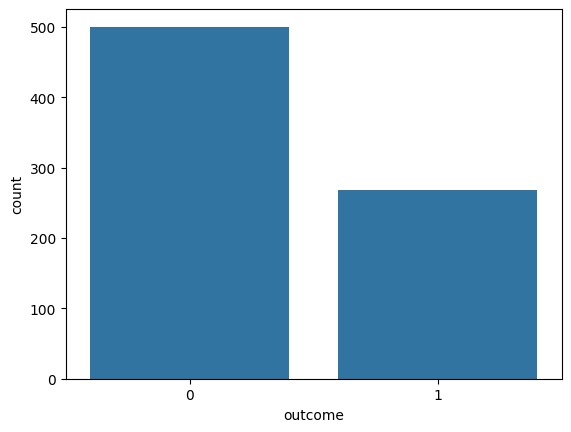

In [47]:
import seaborn as sns
sns.countplot(x='Outcome',data=df)
plt.xlabel('outcome')
plt.ylabel('count')
plt.show()


# 5. Check data distribution using summary statistics and provide your findings(Insights)

In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 6. Do correlation analysis and bivariate viualization with Insights

<Axes: title={'center': 'Pearson Correlation of attributes'}>

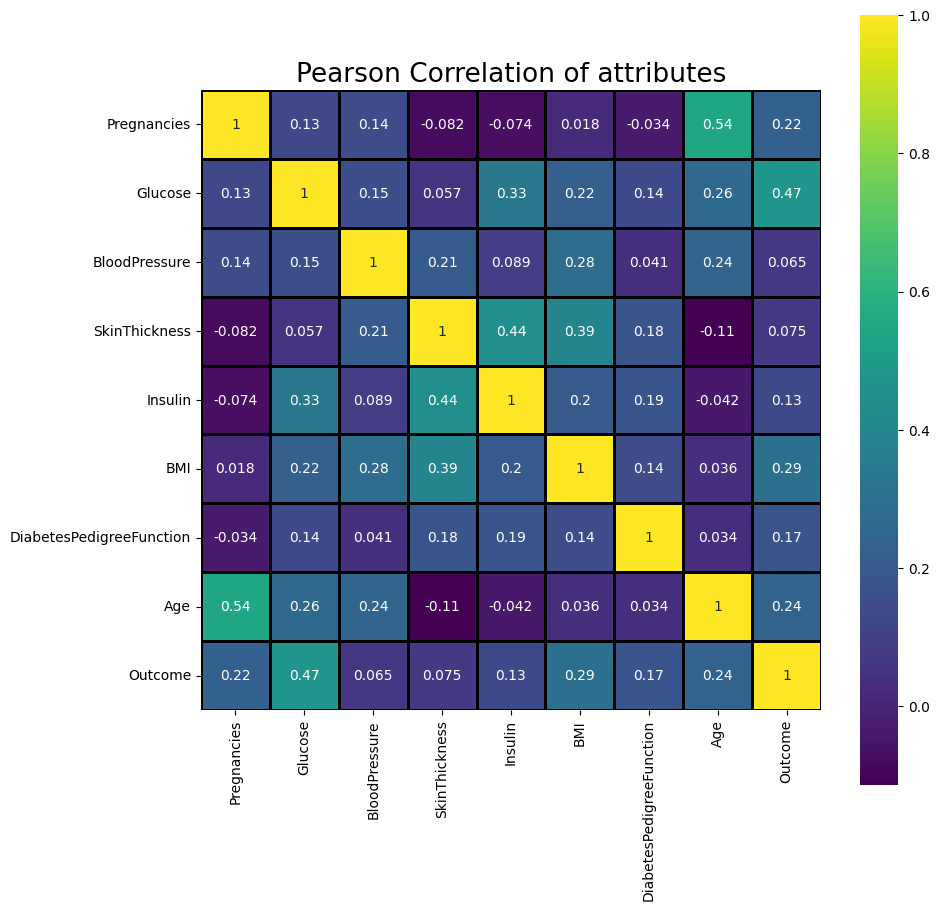

In [49]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of attributes', size=19)
sns.heatmap(df.corr(),linewidths=1,vmax=1,square=True,cmap=colormap,linecolor='black',annot=True)

# 7. Plot a scatter Matrix

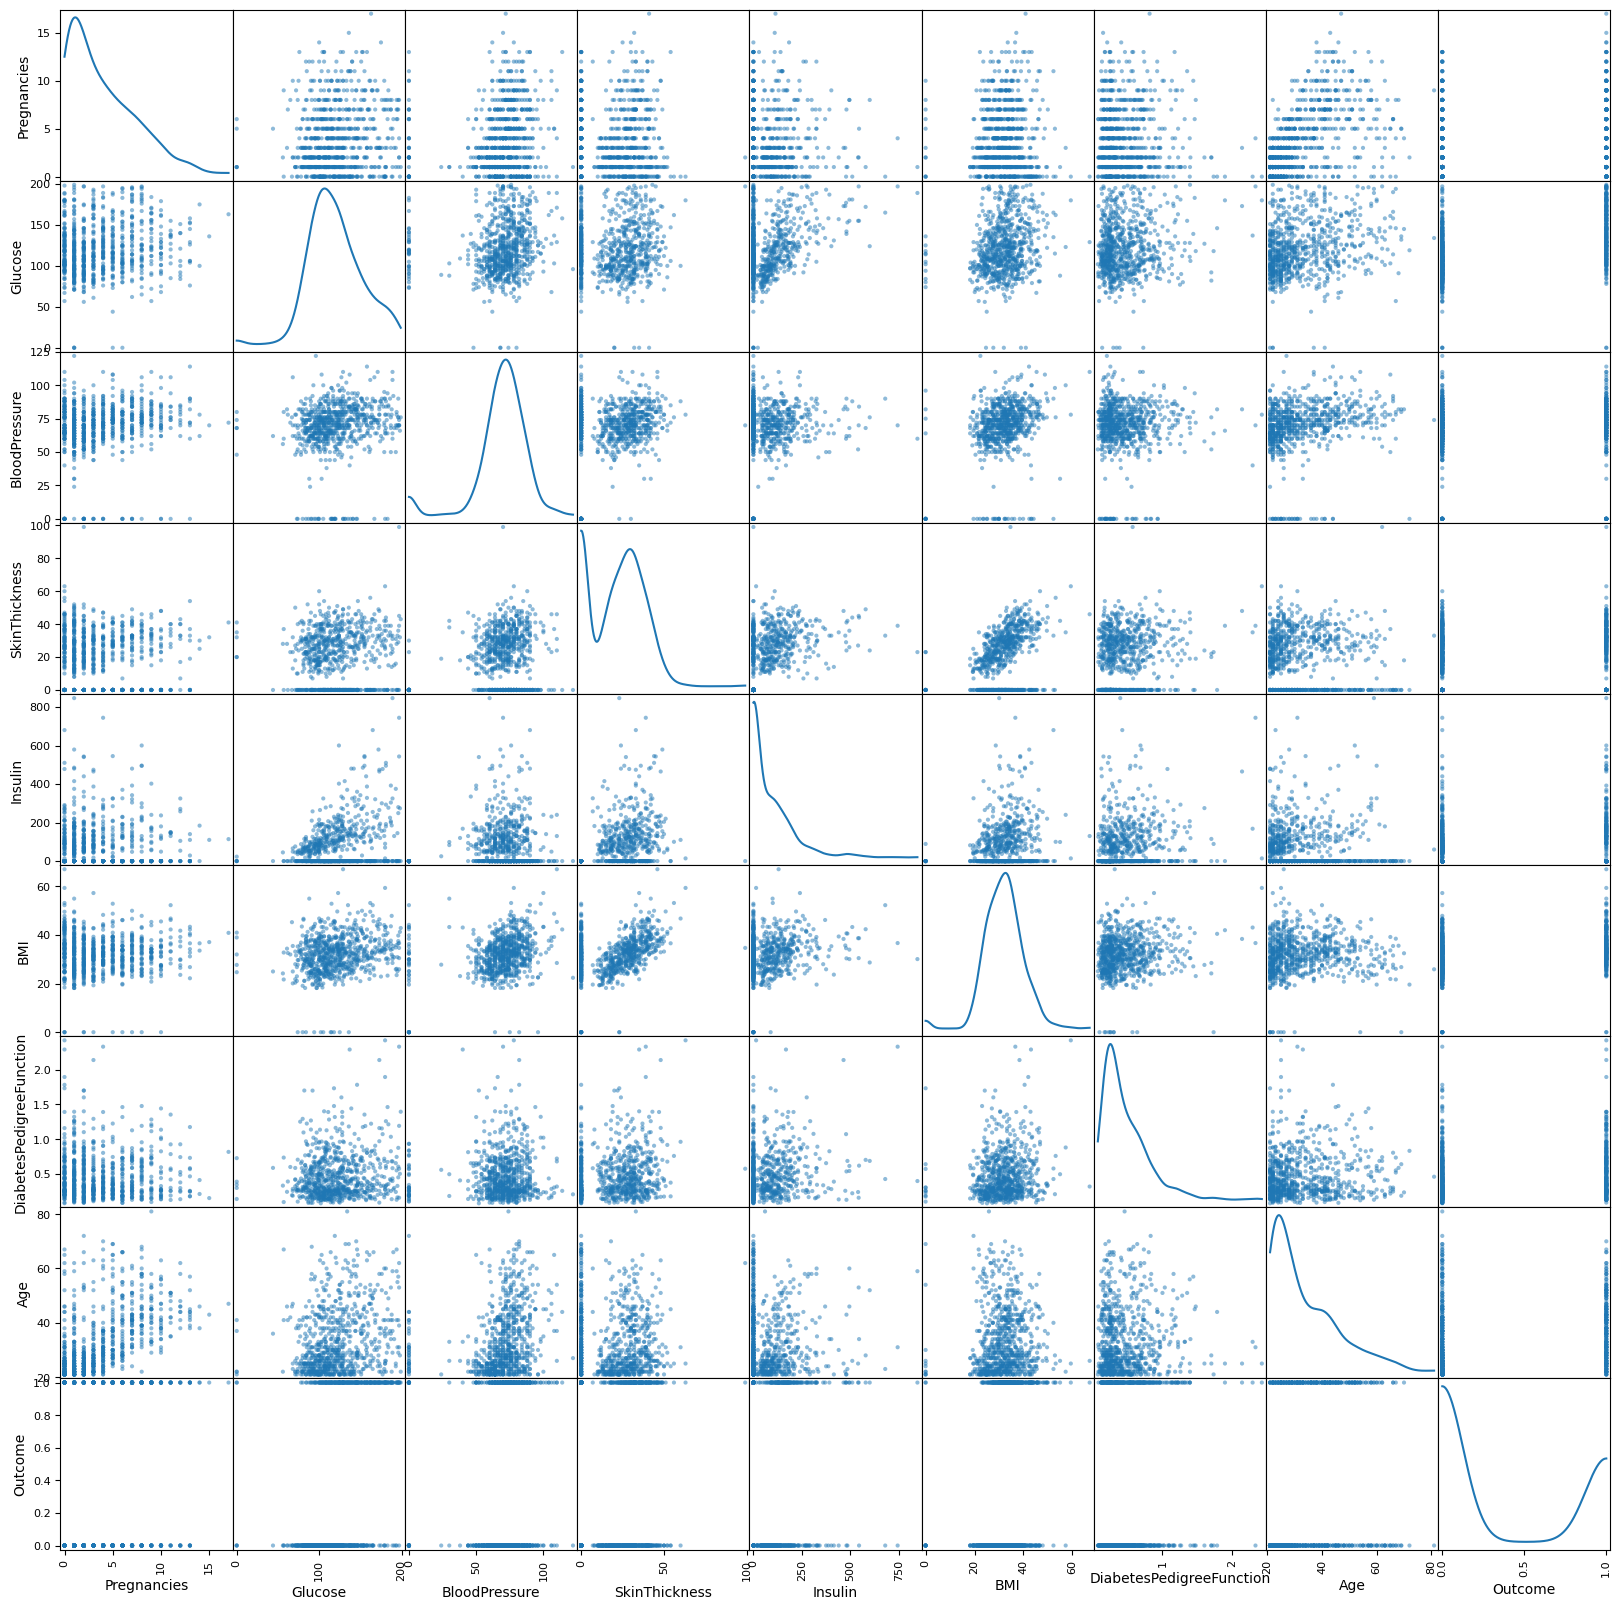

In [50]:
from pandas.plotting import scatter_matrix
scatplot = scatter_matrix(df,figsize=(20,20),diagonal="kde")

# 8. Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable

In [51]:
x_train,x_test,y_train,y_test = train_test_split(df.loc[:,df.columns != 'Outcome'],df['Outcome'],stratify=df['Outcome'],random_state=20)

In [52]:
x_train.shape

(576, 8)

# 9. Train Support Vector Machine Model

In [53]:
svc=SVC()
svc.fit(x_train,y_train)
print('accuracy on training set:{:.2f}'.format(svc.score(x_train,y_train)))
print('accuracy on test set:{:.2f}'.format(svc.score(x_test,y_test)))



accuracy on training set:0.76
accuracy on test set:0.78


# 10. Scale the data points using MinMaxScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
x_train_sacled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


# 11. Fit SVM Model on Scale data and give your observation

In [55]:
svc.fit(x_train_sacled,y_train)
print('accuracy on training set:{:.2f}'.format(svc.score(x_train_sacled,y_train)))
print('accuracy on test set:{:.2f}'.format(svc.score(x_test_scaled,y_test)))

accuracy on training set:0.80
accuracy on test set:0.74


# 12. Try improving the model accuracy using C=1000

In [56]:
svc = SVC(C=100)
svc.fit(x_train_sacled,y_train)
print('accuracy on training set:{:.3f}'.format(svc.score(x_train_sacled,y_train)))
print('accuracy on test set:{:.3f}'.format(svc.score(x_test_scaled,y_test)))


accuracy on training set:0.873
accuracy on test set:0.714


# Here, increasing C allows us to improve the model, resulting in 87.3% train set accuracy.